In [2]:
import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [3]:
img_width, img_height = 80, 80
input_shape = (img_width, img_height, 3)

In [6]:
#Архитектура сети
in_layer = layers.Input(shape = (input_shape))

l = layers.Conv2D(filters = 64, kernel_size=(3,3), padding="same", activation="relu")(in_layer)
l = layers.MaxPool2D(pool_size=(2,2))(l)
l = layers.BatchNormalization()(l)

l = layers.Conv2D(filters = 32, kernel_size=(3,3), padding="same", activation="relu")(l)
l = layers.MaxPool2D(pool_size = (2,2))(l)
l = layers.BatchNormalization()(l)

l = layers.Conv2D(filters = 64, kernel_size=(5,5), padding="same", activation="relu")(l)
l = layers.MaxPool2D(pool_size = (2,2))(l)
l = layers.BatchNormalization()(l)

l = layers.Conv2D(filters = 128, kernel_size=(5,5), padding="same", activation="relu")(l)
l = layers.MaxPool2D(pool_size = (2,2))(l)
l = layers.BatchNormalization()(l)

#l = layers.GlobalAveragePooling2D()(l)

l = layers.Flatten()(l)

l = layers.Dense(256, activation="relu")(l)
l = layers.Dense(128, activation="relu")(l)

out_layer = layers.Dense(6, activation="softmax")(l)

model = keras.Model(in_layer, out_layer)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 80, 80, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 40, 40, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Bat  (None, 40, 40, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 40, 40, 32)        18464     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 20, 20, 32)        0   

In [4]:
#Компиляция модели
loss = keras.losses.categorical_crossentropy
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

In [5]:
#Загрузка датасета для обучения модели (Необходимо заранее выполнить все ячейки файла "Plots_generator")
datagen = ImageDataGenerator(rescale=(1./255)) 
train_generator = datagen.flow_from_directory("train", target_size=(img_width, img_height),
                                             batch_size=10, class_mode="categorical")

Found 3000 images belonging to 6 classes.


In [6]:
model.fit(train_generator, epochs=30,shuffle=True)

Epoch 1/30
300/300 [==============================] - 35s 114ms/step - loss: 0.4815 - accuracy: 0.8127
Epoch 2/30
300/300 [==============================] - 28s 92ms/step - loss: 0.1298 - accuracy: 0.9523
Epoch 3/30
300/300 [==============================] - 27s 92ms/step - loss: 0.0325 - accuracy: 0.9897
Epoch 4/30
300/300 [==============================] - 28s 93ms/step - loss: 0.0518 - accuracy: 0.9820
Epoch 5/30
300/300 [==============================] - 28s 92ms/step - loss: 0.0081 - accuracy: 0.9987
Epoch 6/30
300/300 [==============================] - 28s 92ms/step - loss: 0.0149 - accuracy: 0.9943
Epoch 7/30
300/300 [==============================] - 29s 98ms/step - loss: 0.0311 - accuracy: 0.9903
Epoch 8/30
300/300 [==============================] - 29s 95ms/step - loss: 0.0421 - accuracy: 0.9893
Epoch 9/30
300/300 [==============================] - 29s 96ms/step - loss: 0.0546 - accuracy: 0.9877
Epoch 10/30
300/300 [==============================] - 28s 94ms/step - loss: 0.01

C:\Users\kirit\AppData\Local\Temp\ipykernel_16956\1738192211.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(2,2),dpi=40)


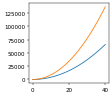

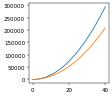

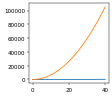

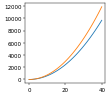

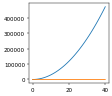

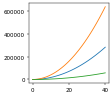

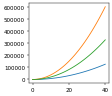

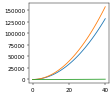

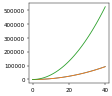

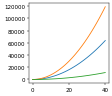

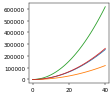

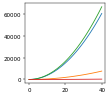

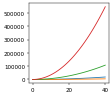

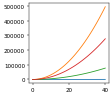

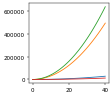

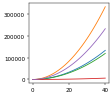

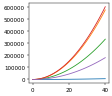

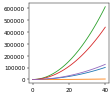

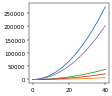

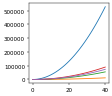

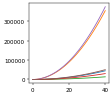

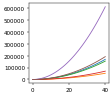

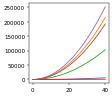

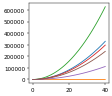

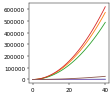

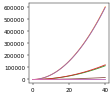

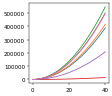

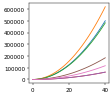

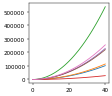

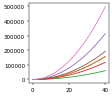

In [7]:
#Создание тестового набора данных для анализа точности модели на новых данных.
import os, shutil, random
import numpy as np
import matplotlib.pyplot as plt
dir_name_for_test = "test"
if os.path.exists(dir_name_for_test):
    shutil.rmtree(dir_name_for_test)
os.makedirs(dir_name_for_test)
for i in range(2,8):
    os.makedirs(os.path.join(dir_name_for_test, f"{i}f_plots"))

X = np.arange(0,41)
for p in range(2, 8):

    for z in range(5):
        fig = plt.figure(figsize=(2,2),dpi=40)
        axes  = fig.add_axes([0,0,1,1])
    
        for i in range(0, p):
            i = (X*random.uniform(0.1,20))**2 
            plt.plot(X, i)
    
        fig.savefig(f"test/{p}f_plots/a{z}.png")

In [8]:
test_generator = datagen.flow_from_directory("test", target_size=(img_width, img_height),
                                             batch_size=10, class_mode="categorical")

Found 30 images belonging to 6 classes.


In [9]:
scores = model.evaluate(test_generator)
print("Точноть модели на новых данных составляет:",(scores[1]*100),"%")

3/3 [==============================] - 0s 41ms/step - loss: 9.9341e-08 - accuracy: 1.0000
Точноть модели на новых данных составляет: 100.0 %


C:\Users\kirit\AppData\Local\Temp\ipykernel_16956\3838162937.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(2,2),dpi=40)


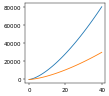

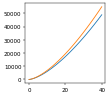

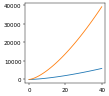

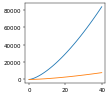

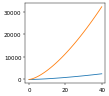

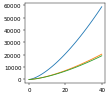

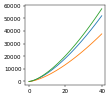

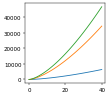

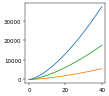

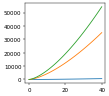

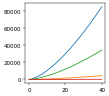

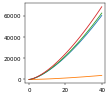

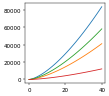

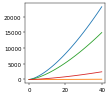

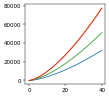

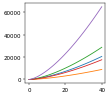

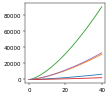

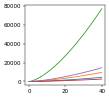

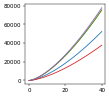

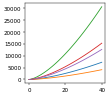

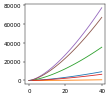

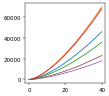

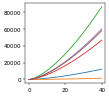

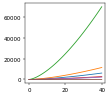

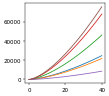

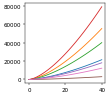

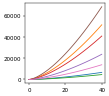

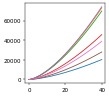

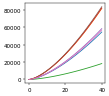

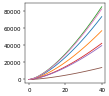

In [10]:
#Для эксперемента попробуем нарисовать графики с функциями менее похожими на предыдущие. 
dir_name_for_test2 = "test2"
if os.path.exists(dir_name_for_test2):
    shutil.rmtree(dir_name_for_test2)
os.makedirs(dir_name_for_test2)
for i in range(2,8):
    os.makedirs(os.path.join(dir_name_for_test2, f"{i}f_plots"))

X = np.arange(0,41)
for p in range(2, 8):

    for z in range(5):
        fig = plt.figure(figsize=(2,2),dpi=40)
        axes  = fig.add_axes([0,0,1,1])
    
        for i in range(0, p):
            i = 4*((X*random.uniform(0.1,20))**1.5) 
            plt.plot(X, i)
    
        fig.savefig(f"test2/{p}f_plots/a{z}.png")

In [11]:
test2_generator = datagen.flow_from_directory("test2", target_size=(img_width, img_height),
                                             batch_size=10, class_mode="categorical")

Found 30 images belonging to 6 classes.


In [12]:
scores = model.evaluate(test2_generator)
print("Точноть модели на новых данных составляет:",(scores[1]*100),"%")

3/3 [==============================] - 0s 41ms/step - loss: 0.7113 - accuracy: 0.9000
Точноть модели на новых данных составляет: 89.99999761581421 %
